# Lecture 2 : Math-To-Code : Solution

# Part 1 : Running Linux Commands in Code Cells

## We can run Linux commands from a code cell using **!**

In [1]:
!git clone https://code.vt.edu/jasonwil/cmda3634_materials.git

Cloning into 'cmda3634_materials'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 141 (delta 35), reused 0 (delta 0), pack-reused 37 (from 1)
Receiving objects: 100% (141/141), 24.70 MiB | 24.51 MiB/s, done.
Resolving deltas: 100% (40/40), done.


## **Be careful:** !cd cmda3634_materials/L02 **does not do what you expect**.

## Instead of changing directories we copy the files we need to the current directory.

In [2]:
!cp cmda3634_materials/L02/* .

## The plot2d.py script makes a plot of a 2D dataset and stores it as an image.

## Note that we are piping the dataset into the program!

In [3]:
!cat points1k.txt | python3 plot2d.py points1k.png

## To display an image directly beneath a code cell use:

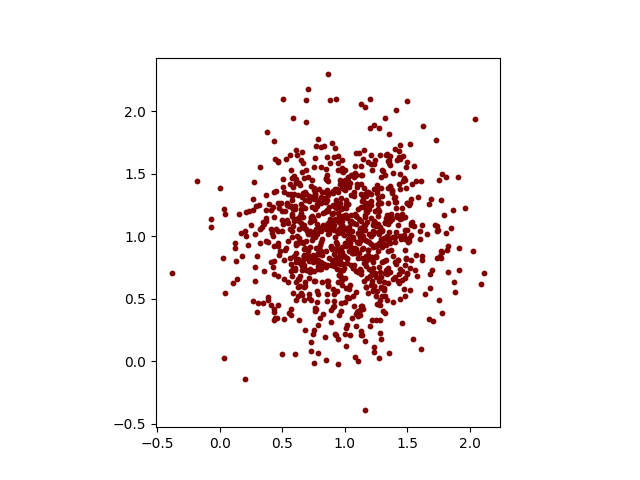

In [4]:
from IPython import display
display.Image("points1k.png")

# Part 2 : Running Java In Google Colab

In [5]:
%%writefile Hello.java

class Hello {
    public static void main(String args[]) {
        System.out.printf ("Hello World!\n");
    }
};


Writing Hello.java


## We first compile to Java bytecode.

In [6]:
!javac Hello.java

## Next, we use the java interpreter to run the bytecode.

In [7]:
!java Hello

Hello World!


# Part 3 : Finding the Extreme Pair of Points

## In the next example we wish to find the pair of points that are farthest apart.  

## We will call this pair the **extreme pair**.  

## To find the pair with the maximum distance we will need to maximize
$$\Large{\| u - v \|}$$
## over all possible pairs of points which is equivalent to maximizing
$$\Large{\| u - v \|^2}$$

## Given $n$ points, there are $\binom{n}{2} = \frac{n(n-1)}{2}$ possible pairs of points.  

## A proof of this fact is that you first pick a point (n choices) and then a second point (n-1 choices) but then you have counted each pair twice since (x,y) and (y,x) are the same pair!

## When enumerating all pairs of points we will use the indices $0, 1, 2, ..., n-1$ of the points.   

## We can avoid repeating the pairs by only counting pairs $(i,j)$ such that $i < j$.  

## Note that this approach also avoids counting $(i,i)$ as a pair.

## Writing code for the extreme pair problem is an example of **math-to-code**.

## To start practicing **math-to-code** we will use Java which everyone is familiar with.

## We first write a utility class **Vec2** that stores a 2D point.  

## The extreme class has a helper function **calc_dist_sq** which calculus the distanced squared between two 2D points and the **main** function which reads the dataset into an array of Vec2 objects and loops through each pair of points to find the extreme pair.

## We assume that the first number of the data file gives the total number of points in the file.

In [8]:
%%writefile Extreme.java
import java.util.Scanner;

// class for a 2d vector
class Vec2 {
    double x,y;

    public Vec2 (double x, double y) {
        this.x = x;
        this.y = y;
    }
};

class Extreme {

    static double calc_dist_sq (Vec2 p1, Vec2 p2) {
        double dx = p1.x - p2.x;
        double dy = p1.y - p2.y;
        return dx*dx + dy*dy;
    }

    public static void main(String args[]) {

        // create a scanner for standard input
        Scanner input = new Scanner(System.in);

        // read the number of points
        int num_points = input.nextInt();

        // read the dataset into an array of Vec2 objects
        Vec2 data[] = new Vec2[num_points];
        for (int i=0;i<num_points;i++) {
            double x = input.nextDouble();
            double y = input.nextDouble();
            data[i] = new Vec2(x,y);
        }

        // test every pair
        double max_dist_sq = 0;
        int extreme_1 = 0;
        int extreme_2 = 1;
        for (int i=0;i<num_points-1;i++) {
            for (int j=i+1;j<num_points;j++) {
                double dist_sq = calc_dist_sq(data[i],data[j]);
                if (dist_sq > max_dist_sq) {
                    max_dist_sq = dist_sq;
                    extreme_1 = i;
                    extreme_2 = j;
                }
            }
        }

        // print the results
        System.out.printf ("The extreme pair has indices (%d,%d)\n",extreme_1,extreme_2);
    }
};

Writing Extreme.java


In [9]:
!javac Extreme.java

In [10]:
!time cat points1k.txt | java Extreme

The extreme pair has indices (446,911)

real	0m0.321s
user	0m0.500s
sys	0m0.040s


## The plot2d_pair.py script makes a plot of a 2D dataset highlighting two special points and stores it as an image.  

In [11]:
!cat points1k.txt | python3 plot2d_pair.py points1k.png 446 911

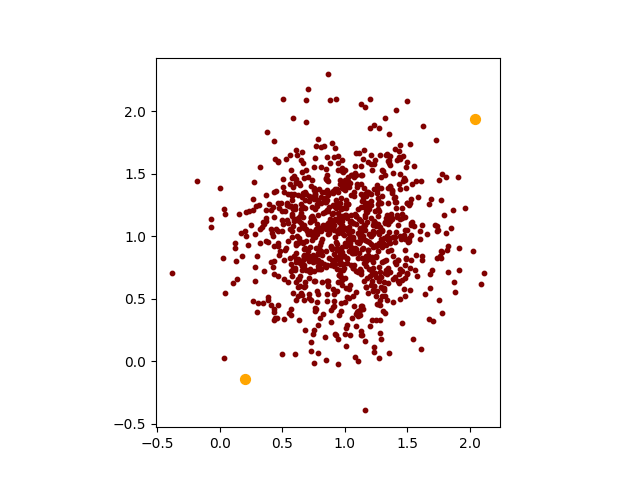

In [12]:
from IPython import display
display.Image("points1k.png")

# Part 4 : The $k$-Center Problem

## Let's consider a set of 128 cities that we have to make deliveries to.

In [13]:
!cat cities128.txt | python3 plot2d.py cities128.png

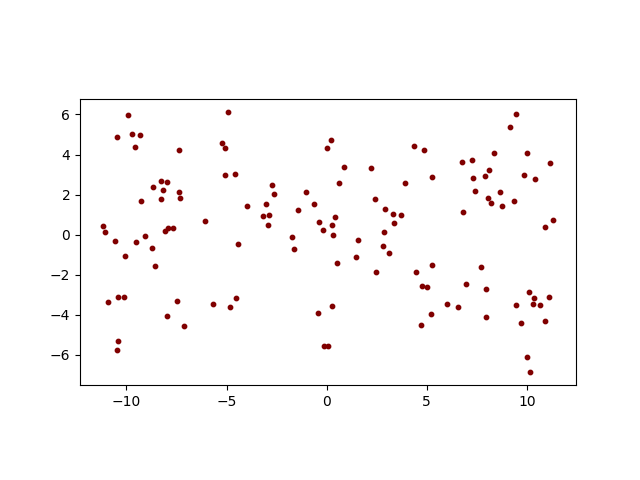

In [14]:
from IPython import display
display.Image("cities128.png")

## Suppose you are working at the delivery company and are tasked with the job of choosing three cities to locate brand new distribution centers.  

## Your goal is to choose three cities so that the **maximum distance** between any city and its **closest** distribution center is **minimized**.  

## The following map shows an optimal solution to this problem.  Each of the proposed distribution center locations is shown with a big dot and each city is color coded according to its **closest** distribution center.

## Note that the city that is **farthest** from its **closest** distribution center is circled.  

## The solution to the problem shown is **optimal** in the sense that for any other choice of three distribution center locations, the city that is farthest from its closest distribution center will be at least this far away.


In [15]:
!cat cities128.txt | python3 kcenter.py optimal3.png 5 44 110

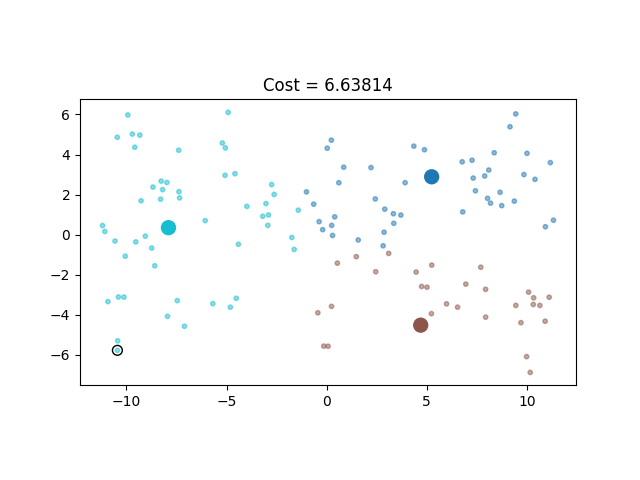

In [16]:
from IPython import display
display.Image("optimal3.png")

## **The $k$-center Problem:**
## Given $n$ points $\mathbf{p}_1, \mathbf{p}_2 \ldots, \mathbf{p}_n$ in $d$-dimensional space, the objective of the $k$-center problem is to choose $k$ center points $\mathbf{c}_1, \mathbf{c}_2, \ldots \mathbf{c}_k$ from the list of $n$ given points so that the **maximum distance** between any point and its **closest** center is **minimized**.

## Mathematically speaking, we wish to choose $k$ center points $\mathbf{c}_1, \mathbf{c}_2, \ldots \mathbf{c}_k$ to **minimize** the following **cost** function.

## $$\text{cost}(\mathbf{c}_1, \mathbf{c}_2, \ldots,
\mathbf{c}_k) =
\max_{1 \leq i \leq n}
\min( \| \mathbf{p}_i
- \mathbf{c}_1 \|, \| \mathbf{p}_i
- \mathbf{c}_2 \|, \ldots \| \mathbf{p}_i
- \mathbf{c}_k \|)$$

##Recall that $\| \mathbf{x} \| = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$ is the length of the vector $\mathbf{x}$.


## **A Brute Force Method for Solving the $k$-center Problem:**

## One way to solve the $k$-center problem is to use a **brute force** algorithm that computes the cost of every possible selection of $k$ center points and outputs a set of $k$ center points for which the cost is minimal.  The number of ways to select $k$ center points from $n$ given points can be computed using the formula

## $$\binom{n}{k} = \displaystyle\frac{n!}{(n-k)! \, k!}$$

## For example, if $n = 1000$ and $k=5$ we see that

## $$\binom{1000}{5} = \displaystyle\frac{1000!}{995! \, 5!} =
\displaystyle\frac{1000(999)(998)(997)(996)}{5(4)(3)(2)(1)} =
8250291250200$$

## To get a ballpark estimate on how long it would take a computer to check this many selections of $5$ centers let's assume that our computer can check $1000000$ selections of $5$ centers per second.  Then it would take around

## $$\displaystyle\frac{8250291250200}{1000000 (60) (60) (24) } \approx
95.5 \text{ days}$$

## to solve the given $5$-center problem using the brute force method!  We can see from this anaysis that the brute force method is only useful for solving small instances of the $k$-center problem.

## Unfortunately, finding an optimal solution to the $k$-center problem is an **NP-hard problem**.  It is suspected that there are no fast (i.e. polynomial-time) algorithms for NP-hard problems, but that has not been proven. Whether or not **P=NP** is perhaps the most famous open problem in computer science.




# Part 5 : Java Implementation of Brute-Force Search

## Note that the code solve the $3$-Center Problem

In [17]:
%%writefile Kcenter3.java

import java.util.Scanner;

// class for a 2d vector
class Vec2 {
    double x,y;

    public Vec2 (double x, double y) {
        this.x = x;
        this.y = y;
    }
};

class Kcenter3 {

    static double calc_dist_sq (Vec2 p1, Vec2 p2) {
        double dx = p1.x - p2.x;
        double dy = p1.y - p2.y;
        return dx*dx + dy*dy;
    }

    // calc the cost squared for centers with indices c1, c2, c3
    static double calc_cost_sq (Vec2 data[], int c1, int c2, int c3) {
        int num_points = data.length;
        double cost_sq = 0;
        for (int i=0;i<num_points;i++) {
            double ds1 = calc_dist_sq(data[i],data[c1]);
            double ds2 = calc_dist_sq(data[i],data[c2]);
            double ds3 = calc_dist_sq(data[i],data[c3]);
            double min_dist_sq = Math.min(ds1,Math.min(ds2,ds3));
            cost_sq = Math.max(min_dist_sq,cost_sq);
        }
        return cost_sq;
    }

    public static void main(String args[]) {

        // create a scanner for standard input
        Scanner input = new Scanner(System.in);

        // read the number of points
        int num_points = input.nextInt();

        // read the data matrix
        Vec2 data[] = new Vec2[num_points];
        for (int i=0;i<num_points;i++) {
            double x = input.nextDouble();
            double y = input.nextDouble();
            data[i] = new Vec2(x,y);
        }

        // compute the minimal cost and an optimal solution
        double min_cost_sq = Double.MAX_VALUE;
        int optimal_centers[] = new int[3];
        int tuples_checked = 0;
        for (int i=0; i<num_points-2; i++) {
            for (int j=i+1; j<num_points-1; j++) {
                for (int k=j+1; k<num_points; k++) {
                    tuples_checked += 1;
                    double cost_sq = calc_cost_sq (data,i,j,k);
                    if (cost_sq < min_cost_sq) {
                        min_cost_sq = cost_sq;
                        optimal_centers[0] = i;
                        optimal_centers[1] = j;
                        optimal_centers[2] = k;
                    }
                }
            }
        }

        // print the results
        System.out.printf ("number of points = %d\n",num_points);
        System.out.printf ("3-tuples checked = %d\n",tuples_checked);
        System.out.printf ("minimal cost = %.2f\n",Math.sqrt(min_cost_sq));
        System.out.printf ("optimal centers : %d %d %d\n",optimal_centers[0],
                optimal_centers[1],optimal_centers[2]);
    }
};

Writing Kcenter3.java


In [18]:
!javac Kcenter3.java

In [19]:
!time cat cities128.txt | java Kcenter3

number of points = 128
3-tuples checked = 341376
minimal cost = 6.64
optimal centers : 5 44 110

real	0m0.584s
user	0m0.716s
sys	0m0.037s


## Note that the we used the centers **5, 44, 110** above when visualizing the optimal solution.

# Part 6 : Class Exercise : Solving the $4$-Center Problem in Java

## Cut-paste the $3$-Center code and modify it to create a $4$-Center code.

## Run and time the code on the 128 city dataset.  Visualize the results.

## Explain why it took the code so much longer to run with $k=4$ then with $k=3$.

## Can you think of a way to optimize the code for $k=4$.  Hint: Could you possibly return from *calc_cost_sq* early?  

## Implement the fast version as *Kcenter4_fast.java*.  Run the optimized version for $k=4$.  How much faster is it than the slow version?

In [20]:
%%writefile Kcenter4.java

import java.util.Scanner;

// class for a 2d vector
class Vec2 {
    double x,y;

    public Vec2 (double x, double y) {
        this.x = x;
        this.y = y;
    }
};

class Kcenter4 {

    static double calc_dist_sq (Vec2 p1, Vec2 p2) {
        double dx = p1.x - p2.x;
        double dy = p1.y - p2.y;
        return dx*dx + dy*dy;
    }

    // calc the cost squared for centers with indices c1, c2, c3, c4
    static double calc_cost_sq (Vec2 data[], int c1, int c2, int c3, int c4) {
        int num_points = data.length;
        double cost_sq = 0;
        for (int i=0;i<num_points;i++) {
            double ds1 = calc_dist_sq(data[i],data[c1]);
            double ds2 = calc_dist_sq(data[i],data[c2]);
            double ds3 = calc_dist_sq(data[i],data[c3]);
            double ds4 = calc_dist_sq(data[i],data[c4]);
            double min_dist_sq = Math.min(Math.min(ds1,ds2),Math.min(ds3,ds4));
            cost_sq = Math.max(min_dist_sq,cost_sq);
        }
        return cost_sq;
    }

    public static void main(String args[]) {

        // create a scanner for standard input
        Scanner input = new Scanner(System.in);

        // read the number of points
        int num_points = input.nextInt();

        // read the data matrix
        Vec2 data[] = new Vec2[num_points];
        for (int i=0;i<num_points;i++) {
            double x = input.nextDouble();
            double y = input.nextDouble();
            data[i] = new Vec2(x,y);
        }

        // compute the minimal cost and an optimal solution
        double min_cost_sq = Double.MAX_VALUE;
        int optimal_centers[] = new int[4];
        int tuples_checked = 0;
        for (int i=0; i<num_points-3; i++) {
            for (int j=i+1; j<num_points-2; j++) {
                for (int k=j+1; k<num_points-1; k++) {
                    for (int l=k+1; l<num_points; l++) {
                        tuples_checked += 1;
                        double cost_sq = calc_cost_sq (data,i,j,k,l);
                        if (cost_sq < min_cost_sq) {
                            min_cost_sq = cost_sq;
                            optimal_centers[0] = i;
                            optimal_centers[1] = j;
                            optimal_centers[2] = k;
                            optimal_centers[3] = l;
                        }
                    }
                }
            }
        }

        // print the results
        System.out.printf ("number of points = %d\n",num_points);
        System.out.printf ("4-tuples checked = %d\n",tuples_checked);
        System.out.printf ("minimal cost = %.2f\n",Math.sqrt(min_cost_sq));
        System.out.printf ("optimal centers : %d %d %d %d\n",optimal_centers[0],
                optimal_centers[1],optimal_centers[2],optimal_centers[3]);
    }
};

Writing Kcenter4.java


In [21]:
!javac Kcenter4.java

In [22]:
!time cat cities128.txt | java Kcenter4

number of points = 128
4-tuples checked = 10668000
minimal cost = 6.10
optimal centers : 2 23 67 116

real	0m15.506s
user	0m15.210s
sys	0m0.063s


In [23]:
!cat cities128.txt | python3 kcenter.py optimal4.png 2 23 67 116

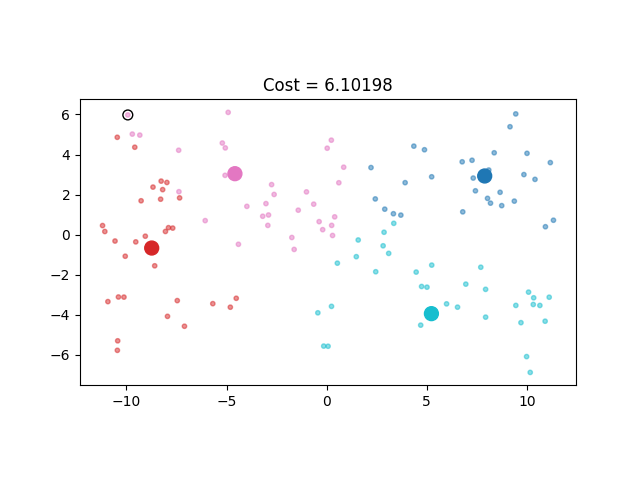

In [24]:
from IPython import display
display.Image("optimal4.png")

## If we find a city that is farther away from its closest center than the current min_cost_sq, we can abort calculating the full cost_sq for that 4-tuple.

In [25]:
%%writefile Kcenter4_fast.java

import java.util.Scanner;

// class for a 2d vector
class Vec2 {
    double x,y;

    public Vec2 (double x, double y) {
        this.x = x;
        this.y = y;
    }
};

class Kcenter4_fast {

    static double calc_dist_sq (Vec2 p1, Vec2 p2) {
        double dx = p1.x - p2.x;
        double dy = p1.y - p2.y;
        return dx*dx + dy*dy;
    }

    // calc the cost squared for centers with indices c1, c2, c3, c4
    static double calc_cost_sq (Vec2 data[], int c1, int c2, int c3, int c4, double min_cost_sq) {
        int num_points = data.length;
        double cost_sq = 0;
        for (int i=0;i<num_points;i++) {
            double ds1 = calc_dist_sq(data[i],data[c1]);
            double ds2 = calc_dist_sq(data[i],data[c2]);
            double ds3 = calc_dist_sq(data[i],data[c3]);
            double ds4 = calc_dist_sq(data[i],data[c4]);
            double min_dist_sq = Math.min(Math.min(ds1,ds2),Math.min(ds3,ds4));
            // Check to see if we can abort the full cost_sq calculation
            if (min_dist_sq > min_cost_sq) return min_dist_sq;
            cost_sq = Math.max(min_dist_sq,cost_sq);
        }
        return cost_sq;
    }

    public static void main(String args[]) {

        // create a scanner for standard input
        Scanner input = new Scanner(System.in);

        // read the number of points
        int num_points = input.nextInt();

        // read the data matrix
        Vec2 data[] = new Vec2[num_points];
        for (int i=0;i<num_points;i++) {
            double x = input.nextDouble();
            double y = input.nextDouble();
            data[i] = new Vec2(x,y);
        }

        // compute the minimal cost and an optimal solution
        double min_cost_sq = Double.MAX_VALUE;
        int optimal_centers[] = new int[4];
        int tuples_checked = 0;
        for (int i=0; i<num_points-3; i++) {
            for (int j=i+1; j<num_points-2; j++) {
                for (int k=j+1; k<num_points-1; k++) {
                    for (int l=k+1; l<num_points; l++) {
                        tuples_checked += 1;
                        double cost_sq = calc_cost_sq (data,i,j,k,l,min_cost_sq);
                        if (cost_sq < min_cost_sq) {
                            min_cost_sq = cost_sq;
                            optimal_centers[0] = i;
                            optimal_centers[1] = j;
                            optimal_centers[2] = k;
                            optimal_centers[3] = l;
                        }
                    }
                }
            }
        }

        // print the results
        System.out.printf ("number of points = %d\n",num_points);
        System.out.printf ("4-tuples checked = %d\n",tuples_checked);
        System.out.printf ("minimal cost = %.2f\n",Math.sqrt(min_cost_sq));
        System.out.printf ("optimal centers : %d %d %d %d\n",optimal_centers[0],
                optimal_centers[1],optimal_centers[2],optimal_centers[3]);
    }
};

Writing Kcenter4_fast.java


In [26]:
!javac Kcenter4_fast.java

In [27]:
!time cat cities128.txt | java Kcenter4_fast

number of points = 128
4-tuples checked = 10668000
minimal cost = 6.10
optimal centers : 2 23 67 116

real	0m1.025s
user	0m1.186s
sys	0m0.037s
